In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import joblib
import matplotlib.pyplot as plt

In [2]:
train_features, train_labels = joblib.load('train_features.pkl')
val_features, val_labels = joblib.load('val_features.pkl')

train_X, val_X, train_y, val_y = train_features, val_features, train_labels, val_labels

In [3]:
train_X[0]

array([0.15814851, 0.2798535 , 1.2773794 , ..., 0.64933026, 0.31953505,
       1.4813101 ], dtype=float32)

In [4]:
model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=1)
model.fit(train_X, train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=1)

In [5]:
prob = model.predict_proba(val_X)
pred = model.predict(val_X)

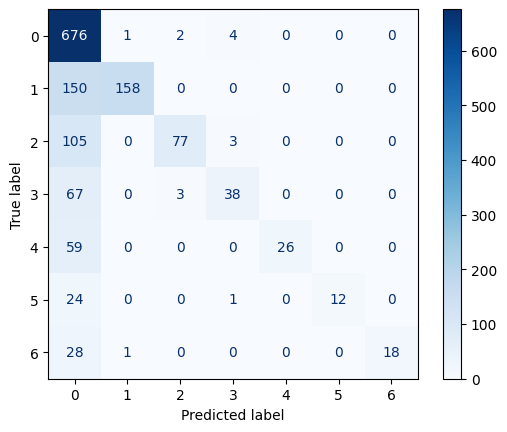

In [6]:
mcm = sklearn.metrics.confusion_matrix(val_y, pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=mcm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
f1_score = sklearn.metrics.f1_score(val_y, pred, average='weighted')
print(f1_score)

0.6656853257314098


In [8]:
roc_auc_score = sklearn.metrics.roc_auc_score(val_y, prob, average='macro', multi_class='ovo')
print(roc_auc_score)

0.9526452871948001


In [9]:
from sklearn.metrics import classification_report

print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75      1109
           1       0.51      0.99      0.68       160
           2       0.42      0.94      0.58        82
           3       0.35      0.83      0.49        46
           4       0.31      1.00      0.47        26
           5       0.32      1.00      0.49        12
           6       0.38      1.00      0.55        18

    accuracy                           0.69      1453
   macro avg       0.47      0.91      0.57      1453
weighted avg       0.86      0.69      0.72      1453



In [10]:
import pickle

with open("randomForest.pkl", "wb") as f:
    pickle.dump(model, f)